In [1]:
cd /content/drive/My Drive/H


/content/drive/My Drive/H


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,AveragePooling2D,MaxPooling2D,Flatten,UpSampling2D,Conv2DTranspose,Input,BatchNormalization
import cv2
import matplotlib.pyplot as plt
import pickle


In [0]:
pickle_in=open("X2.pickle","rb")
X2= pickle.load(pickle_in)
pickle_in=open("Y1_n.pickle","rb")
Y1= pickle.load(pickle_in)
pickle_in=open("X_n.pickle","rb")
X= pickle.load(pickle_in)
pickle_in=open("Y_n.pickle","rb")
Y= pickle.load(pickle_in)

In [4]:
inputs = Input(shape=(512, 512, 3))

x=Conv2D(50,(3,3),activation='relu',strides=1,padding='same')(inputs)
print(x.shape)
x=AveragePooling2D((2,2))(x)
print(x.shape)

x=Conv2D(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
x=AveragePooling2D((2,2))(x)
print(x.shape)


x=Dense(10,activation='relu')(x)
x=Dense(10,activation='relu')(x)


x=Conv2DTranspose(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)

x=Conv2DTranspose(50,(3,3),activation='relu',strides=1,padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)



x=Conv2DTranspose(3,(3,3),activation='linear',strides=1,padding='same')(x)
print(x.shape)


autoencoder1 = Model(inputs, x)
autoencoder1.compile( loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
print(autoencoder1.summary())
autoencoder1.fit(X2, Y1 ,batch_size=32,epochs=100,validation_split=0.1,verbose=1)

#prediction=autoencoder1.predict(X)

W0701 05:45:34.827022 139728578074496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 512, 512, 50)
(?, 256, 256, 50)
(?, 256, 256, 50)
(?, 128, 128, 50)
(?, 128, 128, 50)
(?, 256, 256, 50)


W0701 05:45:35.285312 139728578074496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(?, 256, 256, 50)
(?, 512, 512, 50)
(?, 512, 512, 3)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 50)      1400      
_________________________________________________________________
average_pooling2d (AveragePo (None, 256, 256, 50)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 50)      22550     
_________________________________________________________________
average_pooling2d_1 (Average (None, 128, 128, 50)      0         
_________________________________________________________________
dense (Dense)                (None, 128, 128, 10)      510       
_________________________________________________________________
dense_1 

In [0]:
autoencoder1.save("model_2.model")

In [0]:
pre=autoencoder1.predict(X2)

W0701 06:05:36.459614 139728578074496 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


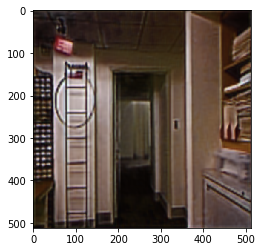

W0701 06:05:36.653023 139728578074496 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


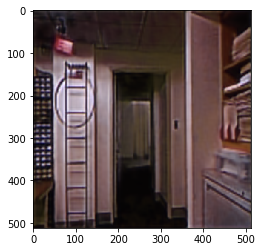

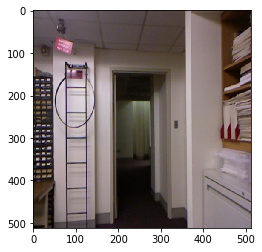

In [10]:
plt.imshow(X2[10])
plt.show()
plt.imshow(pre[10])
plt.show()
plt.imshow(Y1[10])
plt.show()